In [4]:
import sys
import os
import urllib.request, urllib.error, urllib.parse  
import tarfile
import zipfile 
import numpy as np
try:
	import cPickle as pickle
except:
	import pickle
import os  
from explain import create_original_model

Using TensorFlow backend.
/Users/matt_rounds/miniconda2/envs/XA3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/matt_rounds/miniconda2/envs/XA3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [5]:
import scipy.stats

In [6]:
x_val_selected = np.load('data/x_val-L2X.npy')
pred_val = np.load('data/pred_val.npy')

In [7]:
model = create_original_model()

In [22]:
model.weights

[<tf.Variable 'embedding_1/embeddings:0' shape=(5000, 50) dtype=float32_ref>,
 <tf.Variable 'conv1d_1/kernel:0' shape=(3, 50, 250) dtype=float32_ref>,
 <tf.Variable 'conv1d_1/bias:0' shape=(250,) dtype=float32_ref>,
 <tf.Variable 'dense_1/kernel:0' shape=(250, 250) dtype=float32_ref>,
 <tf.Variable 'dense_1/bias:0' shape=(250,) dtype=float32_ref>,
 <tf.Variable 'dense_2/kernel:0' shape=(250, 2) dtype=float32_ref>,
 <tf.Variable 'dense_2/bias:0' shape=(2,) dtype=float32_ref>]

In [8]:
weights_name = [i for i in os.listdir('./models') if i.startswith('original')][0]
model.load_weights('./models/'+weights_name,by_name=True)

In [9]:
def load_data():
    x_train, y_train, x_val, y_val = np.load('data/x_train.npy'),np.load('data/y_train.npy'),np.load('data/x_val.npy'),np.load('data/y_val.npy')
    with open('data/id_to_word.pkl','rb') as f:
        id_to_word = pickle.load(f)
    return x_train, y_train, x_val, y_val, id_to_word

In [10]:
x_train, y_train, x_val, y_val, id_to_word = load_data()

In [19]:
def explanation_of_review(id):
    print(''.join([id_to_word[word]+ ' ' for word in x_val[id,:] if word != 0]))
    print(' ')
    
    descriptions = [id_to_word[word]+ ' ' for word in x_val_selected[id,:] if word != 0]
    
    score = []
    for ind in np.argsort(scores[id, :])[::-1]:
        score.append(ind)
    
    new_desc = [line for (time,line) in sorted(zip(score, descriptions))]
    
    print(''.join(new_desc))
    
    pred_val = model.predict(x_val_selected[id:id+1,:], verbose=0, batch_size=1)
    print(' ')
    print('Probability Positive: {}'.format(pred_val[0,1]))
    print('Probability Negative: {}'.format(pred_val[0,0]))

In [20]:
explanation_of_review(8040)

<START> <UNK> is sent in his cage on a train by his old lady owner in the same <UNK> car also in a cage is <UNK> br br in no time <UNK> has <UNK> <UNK> but a comes back and <UNK> the <UNK> as he calls him back in his cage he puts <UNK> in a <UNK> place up high and tells the cat now remember no tricks <UNK> puts his <UNK> on and looks innocent yeah right br br i found the funniest stuff however didn't involve <UNK> versus <UNK> but the dog that is in another cage next to <UNK> the cat gets <UNK> with him and pays a big price in an extremely funny manner <UNK> just doesn't learn but that's one reason we love him i know a number of imdb reviewers don't like <UNK> but i like both main characters they both crack me up br br also the train and the passing scenery is beautifully <UNK> in here really nice visuals 
 
funniest beautifully train funny extremely comes both the him train 
 
Probability Positive: 0.9971569776535034
Probability Negative: 0.0028430449310690165


In [13]:
scores = np.load('data/scores.npy')
scores2 = np.load('data/scores2.npy')

In [4]:
thingys = np.zeros((len(scores),15))

for instance in range(len(scores)):
    s1 = np.argsort(scores[instance, :])[::-1]
    s2 = np.argsort(scores2[instance, :])[::-1]
    
    a1 = np.array(range(1,len(s1)+1))
    a2 = np.zeros(len(s1))
    for index in a1:
        for idx, score in enumerate(s2):
            if score == s1[index-1]:
                a2[idx] = index
    
    for r in range(15):
         thingys[instance, r] = scipy.stats.spearmanr(a1[:r+1],a2[:r+1])[0]

In [5]:
means = np.mean(np.abs(thingys), axis=0)[1:]

In [9]:
thingys2 = np.zeros((len(scores),15))

for instance in range(len(scores)):
    s12 = np.argsort(scores[instance, :])
    s22 = np.argsort(scores2[instance, :])
    
    a12 = np.array(range(1,len(s12)+1))
    a22 = np.zeros(len(s12))
    for index in a12:
        for idx, score in enumerate(s22):
            if score == s12[index-1]:
                a22[idx] = index
    
    for r in range(15):
         thingys[instance, r] = scipy.stats.spearmanr(a12[:r+1],a22[:r+1])[0]

In [10]:
means2 = np.mean(np.abs(thingys2), axis=0)[1:]

In [7]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/matt_rounds/miniconda2/envs/XA3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


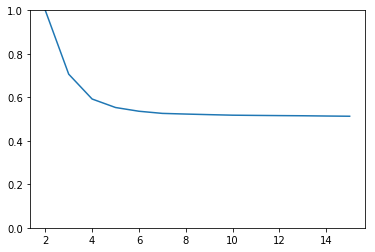

In [12]:
import matplotlib.pyplot as plt

x = range(2,16)

plt.plot(x,means)
axes = plt.gca()
axes.set_ylim([0.0,1.0])

plt.show()

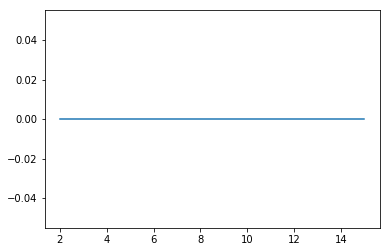

In [28]:
plt.plot(x,means2)
plt.show()

In [ ]:
A = 